# Dpp Sampling

In [1]:
from dppy.finite_dpps import FiniteDPP
from pydpp.dpp import DPP
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

ModuleNotFoundError: No module named 'dppy'

In [91]:
e_feat = np.load('edge_features_train.npy')
label = e_feat[:,0]-1
feat = e_feat[:,1:]

In [92]:
Counter(label).most_common()

[(0.0, 705),
 (1.0, 482),
 (2.0, 380),
 (3.0, 124),
 (4.0, 123),
 (5.0, 72),
 (6.0, 60),
 (7.0, 59),
 (8.0, 41),
 (10.0, 13),
 (9.0, 13),
 (11.0, 6)]

In [148]:
dpp = DPP(feat)
dpp.compute_kernel(kernel_type = 'cos-sim')#, sigma= 0.4)
ksamlpes = dpp.sample_k(36)

In [149]:
label[ksamlpes]

array([4., 0., 4., 2., 0., 2., 0., 0., 0., 0., 1., 1., 0., 0., 2., 2., 0.,
       0., 0., 1., 7., 2., 1., 1., 1., 1., 1., 2., 1., 1., 3., 3., 1., 2.,
       1., 1.])

## Visualization of the sampled nodes

In [42]:
label_list = [[] for i in range(12)]
for i in range(len(label)):
    label_list[int(label[i])].append(i)

In [43]:
tag  = 'normlize'
if tag == 'normlize':
    embedded = normalize(feat)

tsne = TSNE(n_components=2, init='pca', learning_rate=200,
            random_state=501,perplexity=50,n_iter=4000,
            verbose=1)
tsne_result = tsne.fit_transform(embedded)
x_min, x_max = tsne_result.min(0), tsne_result.max(0)
X_norm = (tsne_result - x_min) / (x_max - x_min)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2078 samples in 0.090s...
[t-SNE] Computed neighbors for 2078 samples in 3.303s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2078
[t-SNE] Computed conditional probabilities for sample 2000 / 2078
[t-SNE] Computed conditional probabilities for sample 2078 / 2078
[t-SNE] Mean sigma: 0.122461
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.435570
[t-SNE] KL divergence after 4000 iterations: 0.599350


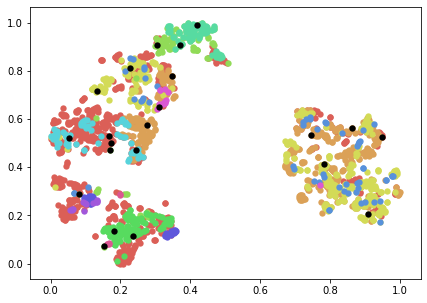

In [70]:
x       = X_norm
palette = np.array(sns.color_palette("hls", 12))
fig     = plt.figure(figsize=(7,5))
for i in range(12):
    plt.scatter(x[label_list[i],0], x[label_list[i],1], lw=0, s=40, color = palette[i], label = '{}'.format(i))
    
plt.scatter(x[ksamlpes,0], x[ksamlpes,1], lw=0, s=40, color = 'black')
#plt.scatter(x[label_list[0],0], x[index_0,1], lw=0, s=40, color = palette[0], label = '0')
#plt.scatter(x[label_list[1],0], x[index_1,1], lw=0, s=40, color = palette[2], label = '1')

# Clustering

In [137]:
from sklearn.cluster import k_means, SpectralClustering
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

### kmeans

In [176]:
centroid, pred, inertia = k_means(feat, n_clusters = 12)

In [177]:
ARI = adjusted_rand_score(label, pred)
NMI = normalized_mutual_info_score(label, pred)

In [178]:
print(ARI, NMI)

0.13529205180891876 0.3355340348610078


In [179]:
pred_list = [[] for i in range(12)]
for i in range(len(pred)):
    pred_list[int(pred[i])].append(i)

In [180]:
pred_centroid_list = []
for i in range(12):
    pred_centroid_list.append(feat[pred_list[i]].mean(axis=0))
pred_centroid_array = np.array(pred_centroid_list)

In [181]:
knn.predict(pred_centroid_array)

array([0., 0., 6., 5., 2., 1., 0., 1., 0., 4., 1., 0.])

### spectral clustering

In [182]:
clustering = SpectralClustering(n_clusters=12, assign_labels='discretize', random_state=0).fit(feat)
pred = clustering.labels_

In [183]:
ARI = adjusted_rand_score(label, pred)
NMI = normalized_mutual_info_score(label, pred)
print(ARI, NMI)

0.19428874338387253 0.3371526142962778


In [184]:
pred_list = [[] for i in range(12)]
for i in range(len(pred)):
    pred_list[int(pred[i])].append(i)

In [185]:
pred_centroid_list = []
for i in range(12):
    pred_centroid_list.append(feat[pred_list[i]].mean(axis=0))
pred_centroid_array = np.array(pred_centroid_list)
knn.predict(pred_centroid_array)

array([0., 1., 0., 0., 5., 2., 1., 5., 4., 1., 0., 2.])

# Centroid when the labels are known

In [168]:
from sklearn import neighbors
centroid_list = []
for i in range(12):
    centroid_list.append(feat[label_list[i]].mean(axis=0))
centroid_array = np.array(centroid_list)

In [174]:
knn = neighbors.KNeighborsClassifier(5, weights = 'distance')
knn.fit(feat, label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [175]:
knn.predict(centroid_array)

array([ 0.,  1.,  2.,  5.,  4.,  5.,  0.,  2.,  8.,  9., 10., 11.])